1)
โหลด csv เข้าไปใน Python Pandas
จาก (https://www.kaggle.com/shree1992/housedata)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# packages for modeling building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

2) เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:

df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3082,2014-06-23 00:00:00,399950.0,3.0,1.75,1560,5223,1.0,0,0,4,810,750,1940,2001,3630 NE 123rd St,Seattle,WA 98125,USA
1089,2014-05-21 00:00:00,975000.0,5.0,4.00,4850,36450,2.0,0,0,3,4850,0,1977,2004,13600 NE 36th Pl,Bellevue,WA 98005,USA
2928,2014-06-20 00:00:00,455000.0,3.0,2.25,1470,4653,2.0,0,0,4,1470,0,1985,0,24201-24231 SE 43rd Ct,Issaquah,WA 98029,USA
1897,2014-06-04 00:00:00,989000.0,5.0,3.50,3280,4000,2.0,0,0,3,2440,840,2003,0,8309 30th Ave NW,Seattle,WA 98117,USA
3340,2014-06-25 00:00:00,770000.0,4.0,2.50,3920,12415,2.0,0,0,3,3920,0,1997,0,23013 SE 44th St,Sammamish,WA 98075,USA
1584,2014-05-29 00:00:00,1425000.0,4.0,4.25,4960,6000,2.5,0,0,3,3680,1280,1909,2003,2611 1st Ave N,Seattle,WA 98109,USA
2937,2014-06-20 00:00:00,665900.0,4.0,2.25,2870,5453,2.0,0,1,4,2220,650,1926,1993,10030 44th Ave SW,Seattle,WA 98146,USA
3592,2014-06-27 00:00:00,235000.0,3.0,1.75,1950,8712,1.0,0,0,3,1950,0,1960,2012,18201-18223 114th Ave SE,Renton,WA 98055,USA
416,2014-05-09 00:00:00,260000.0,3.0,2.00,1920,8075,1.0,0,0,4,1510,410,1969,0,32704 33rd Ave SW,Federal Way,WA 98023,USA
3996,2014-07-07 00:00:00,295000.0,3.0,1.50,1640,7222,2.0,0,0,4,1640,0,1908,0,9047 4th Ave S,Seattle,WA 98108,USA


3)
เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [15]:
print('จำนวนแถวที่มีข้อมูลเป็นศูนย์ในแต่ละคอลัมภ์')
print('price\t\t:' ,(df['price']==0).sum())
print('bedrooms\t:',(df['bedrooms']==0).sum())
print('bathrooms\t:',(df['bathrooms']==0).sum())

จำนวนแถวที่มีข้อมูลเป็นศูนย์ในแต่ละคอลัมภ์
price		: 49
bedrooms	: 2
bathrooms	: 2


ตัดแถว bedrooms, bathrooms, price ที่ = 0 ทิ้ง เพราะถือเป็น missing value และมีไม่กี่แถว 

จึงเลือกตัดออกแทนที่จะแทนที่ศูนย์ด้วยค่าเฉลี่ย

In [16]:
df = df[(df['bedrooms']!=0) & (df['bathrooms']!=0) & (df['price']!=0)]

In [17]:
print('จำนวนแถวที่มีข้อมูลเป็นศูนย์ในแต่ละคอลัมภ์')
print('price\t\t:' ,(df['price']==0).sum())
print('bedrooms\t:',(df['bedrooms']==0).sum())
print('bathrooms\t:',(df['bathrooms']==0).sum())

จำนวนแถวที่มีข้อมูลเป็นศูนย์ในแต่ละคอลัมภ์
price		: 0
bedrooms	: 0
bathrooms	: 0


4) ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [18]:
df.describe().style.format("{:.2f}")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00
mean,557625.65,3.40,2.16,2131.58,14834.60,1.51,0.01,0.23,3.45,1821.29,310.29,1970.79,808.04
std,563891.45,0.90,0.78,955.23,35971.14,0.54,0.08,0.77,0.68,853.29,462.04,29.76,979.31
min,7800.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,326100.00,3.00,1.75,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,465000.00,3.00,2.25,1970.00,7680.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,657500.00,4.00,2.50,2610.00,10970.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


5)
ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

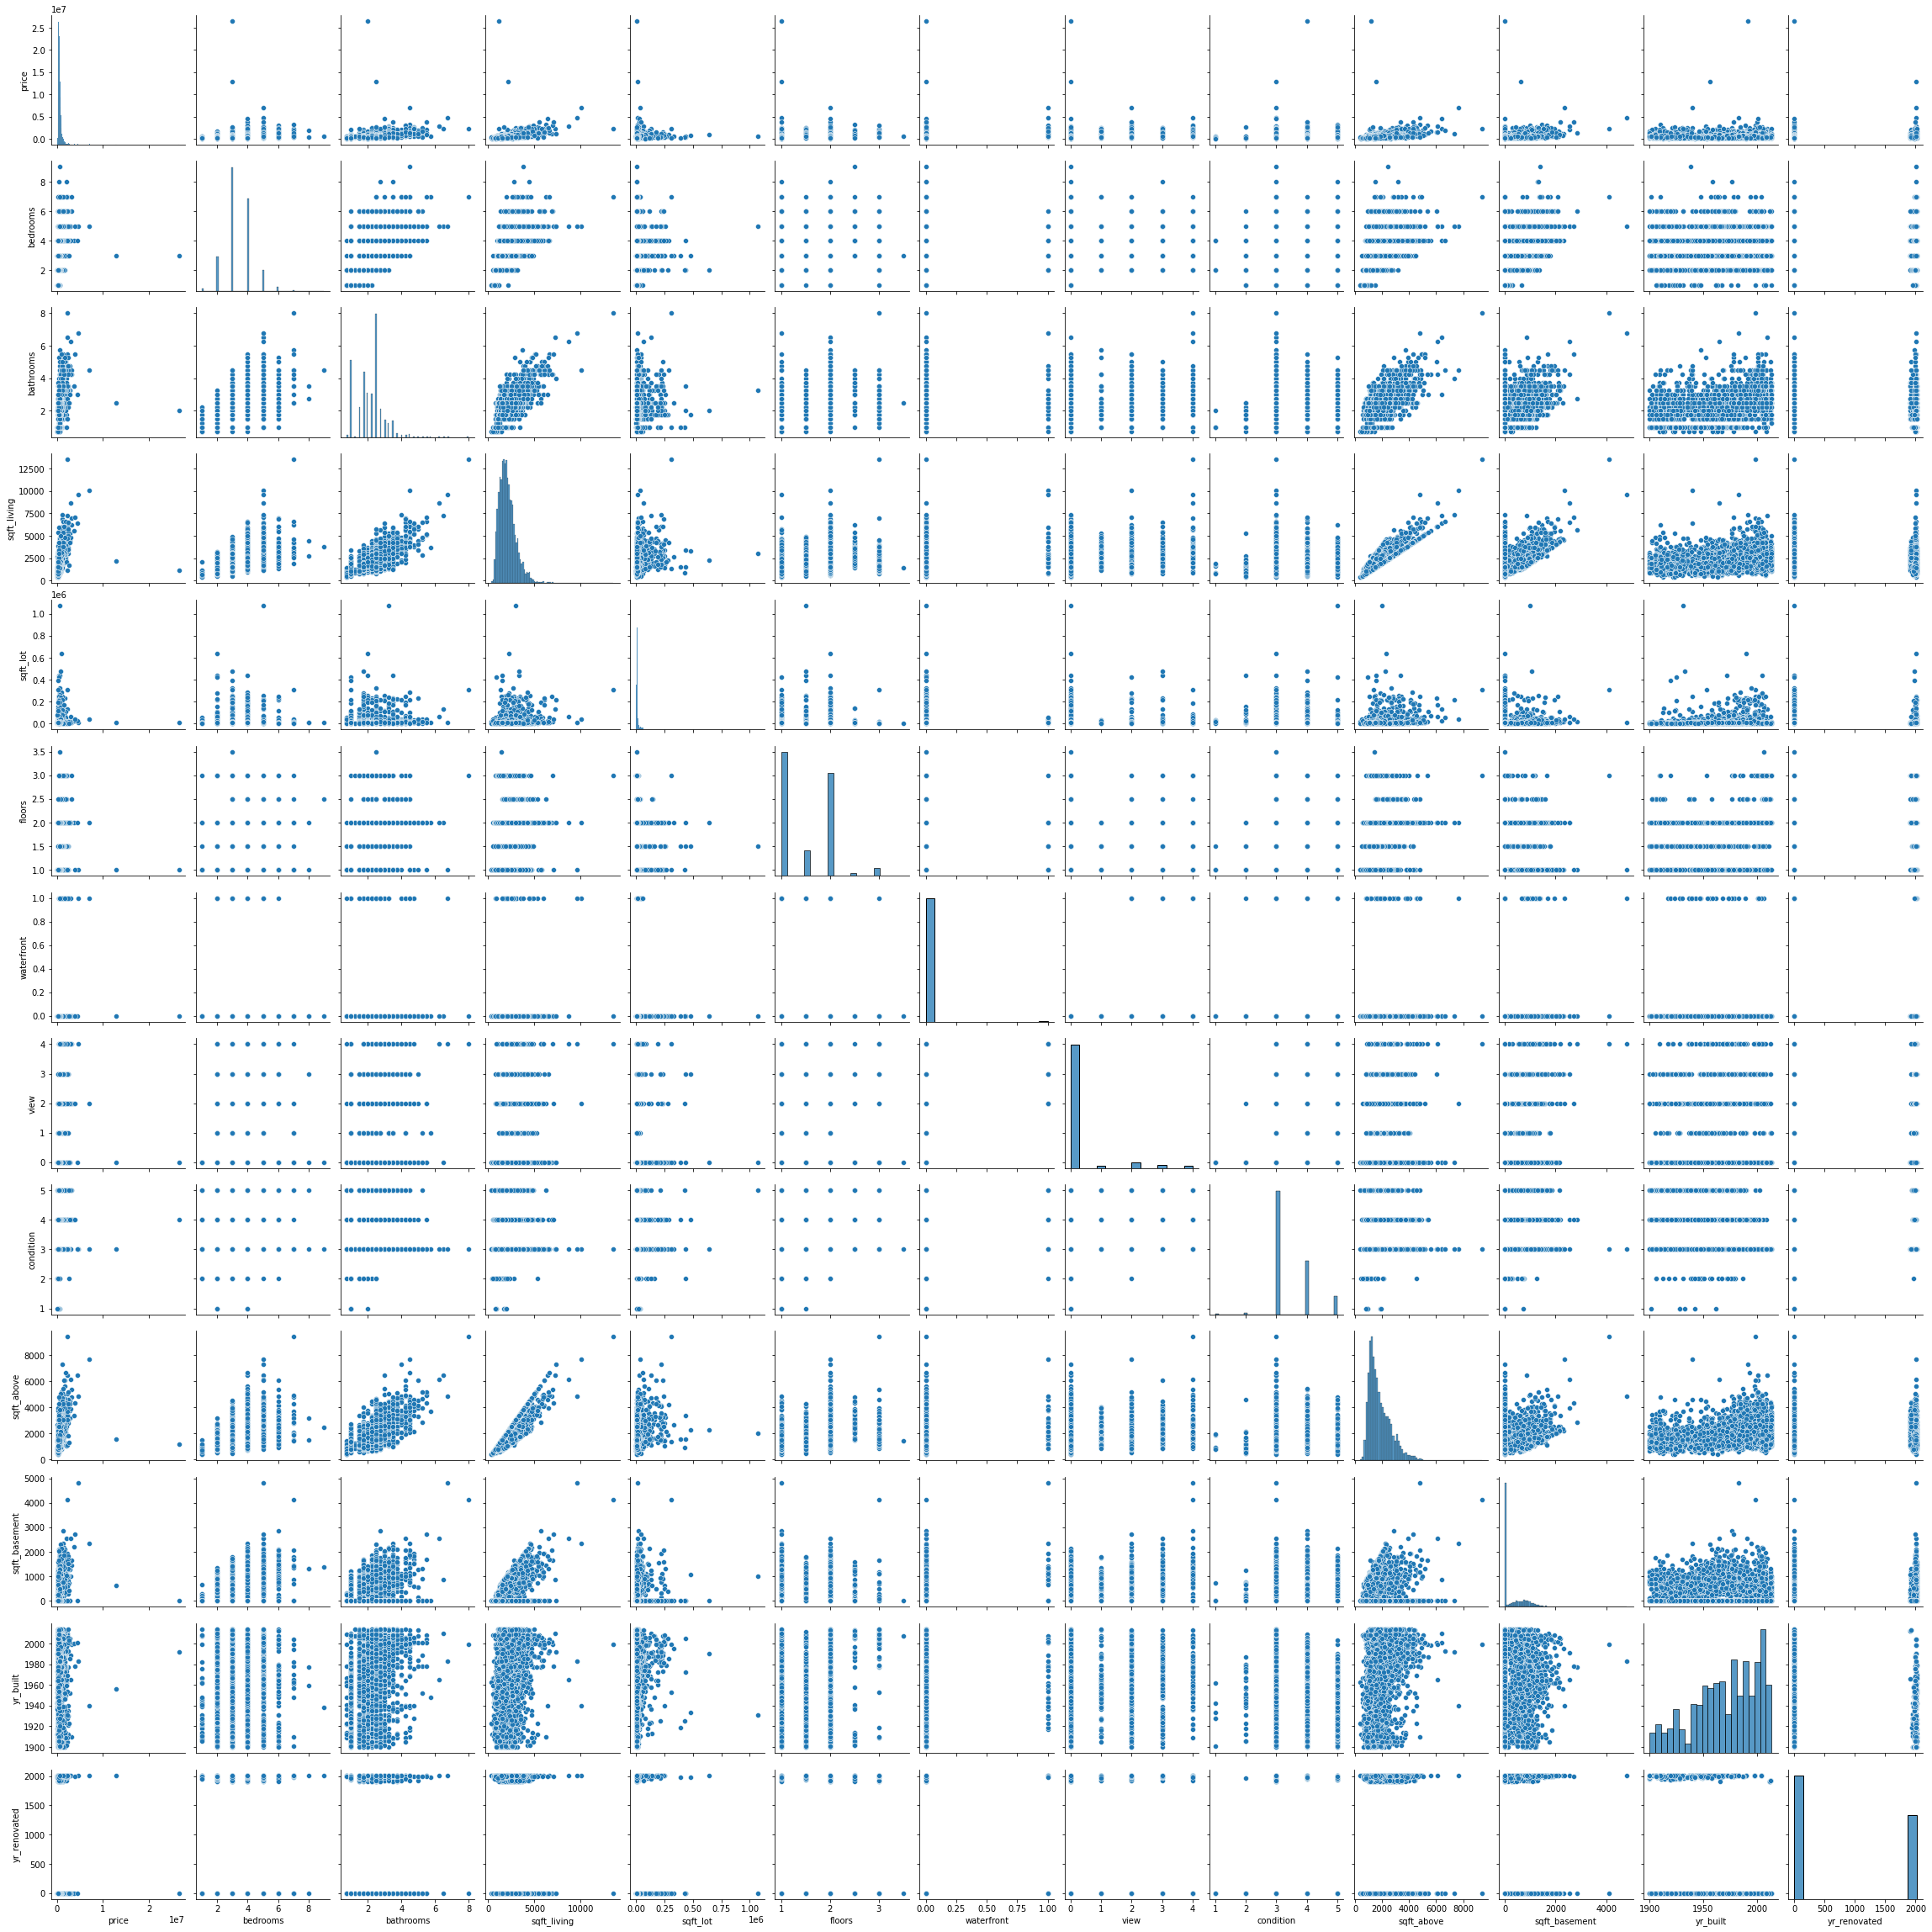

In [19]:
sns.pairplot(df)

6)
ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

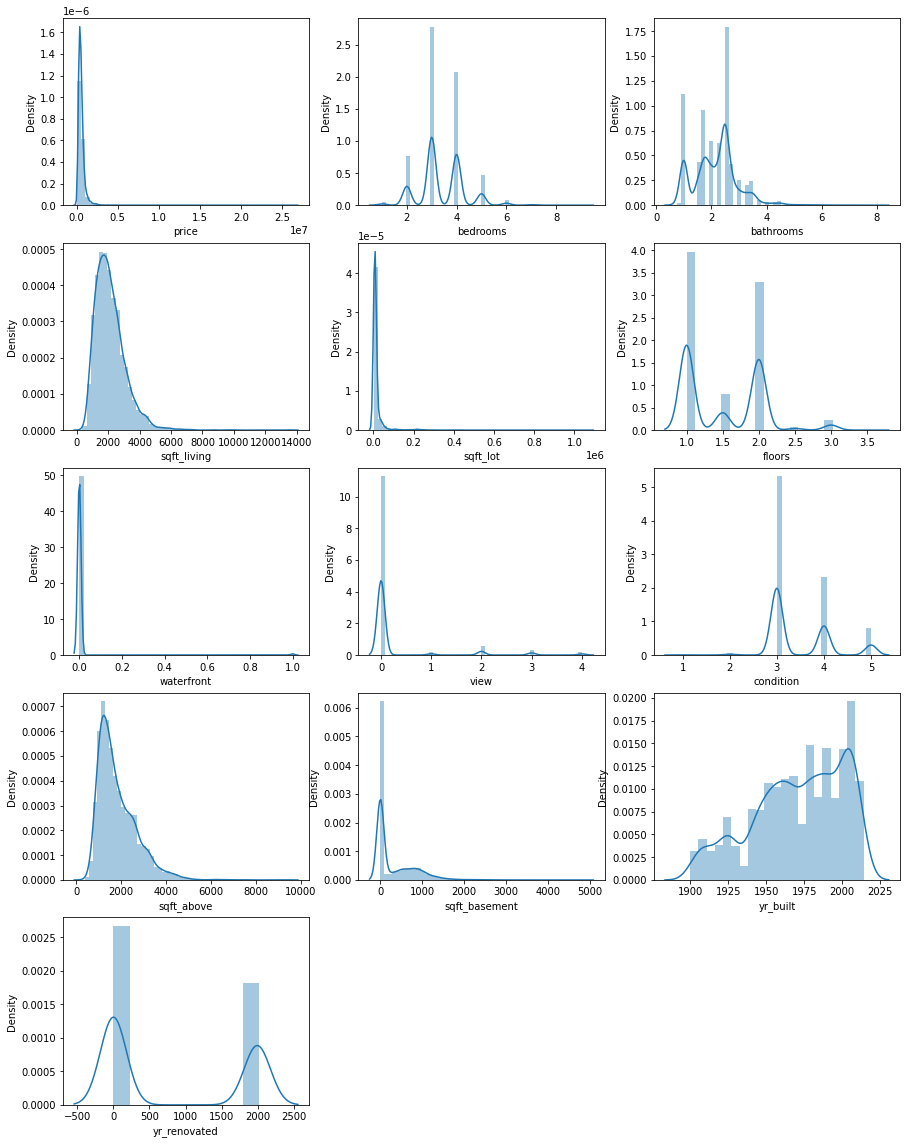

In [20]:
fig = plt.figure(figsize=(15,20))

plt.subplot(531);sns.distplot(df['price'])
plt.subplot(532);sns.distplot(df['bedrooms'])
plt.subplot(533);sns.distplot(df['bathrooms'])

plt.subplot(534);sns.distplot(df['sqft_living'])
plt.subplot(535);sns.distplot(df['sqft_lot'])
plt.subplot(536);sns.distplot(df['floors'])

plt.subplot(537);sns.distplot(df['waterfront'], kde_kws={'bw':0.1})
plt.subplot(538);sns.distplot(df['view'], kde_kws={'bw':0.1})
plt.subplot(539);sns.distplot(df['condition'])

plt.subplot(5,3,10);sns.distplot(df['sqft_above'])
plt.subplot(5,3,11);sns.distplot(df['sqft_basement'])
plt.subplot(5,3,12);sns.distplot(df['yr_built'])

plt.subplot(5,3,13);sns.distplot(df['yr_renovated'])

plt.show()

7)
ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

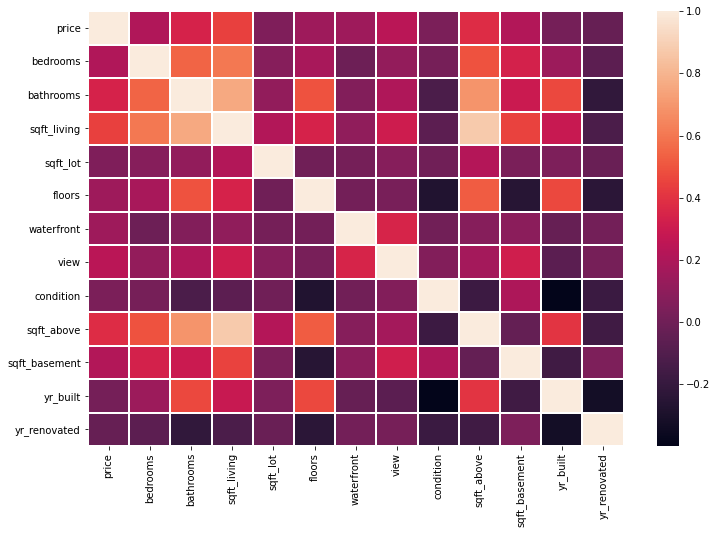

In [21]:
fig = plt.figure(figsize=(12,8))
#sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='white',linewidth=1)
sns.heatmap(df.corr(),linewidth=1)

8)
สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

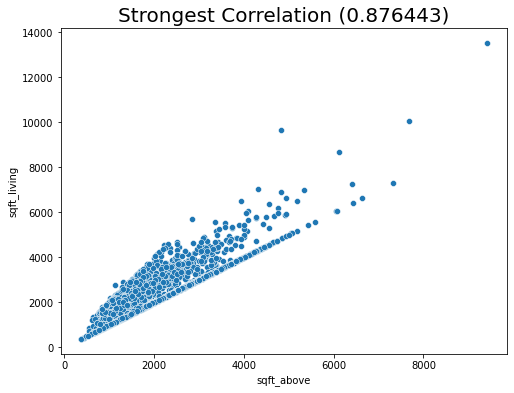

In [22]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_above',y='sqft_living',data=df)
plt.title('Strongest Correlation (0.876443)', fontsize=20)
plt.show()

9)
สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

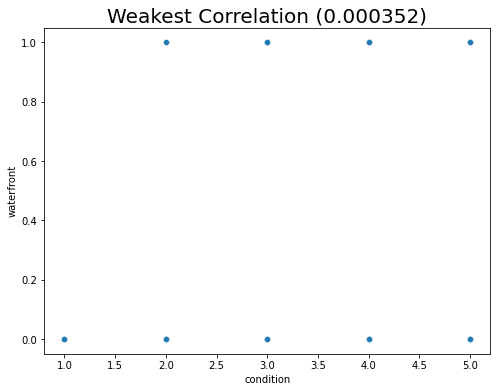

In [23]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x='condition',y='waterfront',data=df)
plt.title('Weakest Correlation (0.000352)', fontsize=20)
plt.show()

10)
สร้าง histogram ของ price

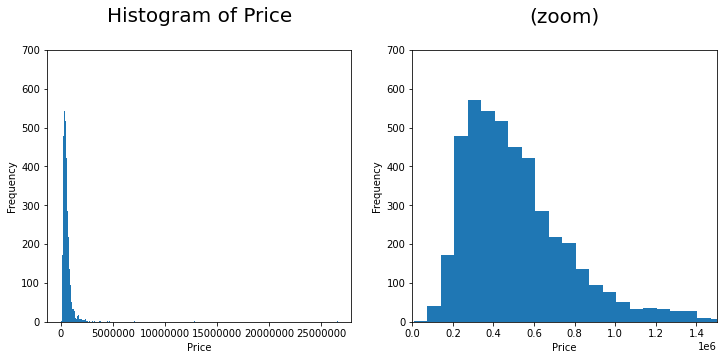

In [24]:
fig = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.hist(df['price'],bins=400)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price\n', fontsize=20)
plt.ylim([0,700])
plt.ticklabel_format(style='plain')

plt.subplot(122)
plt.hist(df['price'],bins=400)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('(zoom)\n', fontsize=20)
plt.ylim([0,700])
plt.xlim([0,1.5e6])

plt.show()

11)
สร้าง box plot ของราคา

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

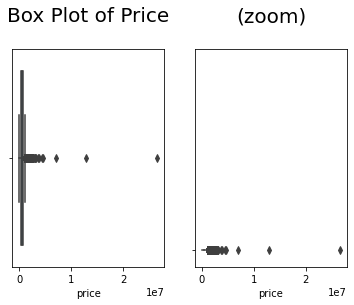

In [25]:

plt.subplot(121)
sns.boxplot(df['price'], orient='v')
plt.title('Box Plot of Price\n', fontsize=20)

plt.subplot(122)
sns.boxplot(df['price'], orient='v')
plt.title('(zoom)\n', fontsize=20)
plt.ylim([-1e5,1.2e6])

plt.show()

13) ทำ Data Transformation และ Data Scaling

In [26]:
# จำกัด data ที่ช่วง price = [3e5, 7e5]
# outlier removed
df2 = df[df['price']<1.2e6]

In [27]:
df['sqft_living'].tail(20)

4579    1990
4580    1560
4581    1740
4582    1290
4583    1700
4584    1880
4585    1890
4586    1620
4587     770
4589    1040
4590    2620
4591    1880
4592    2530
4593    2538
4594    1610
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, dtype: int64

In [28]:
# Data Transformation

# full range data
X = np.array(df['sqft_living']).reshape(-1,1)
y = np.array(df['price']).reshape(-1,1)

# outlier removed
X2 = np.array(df2['sqft_living']).reshape(-1,1)
y2 = np.array(df2['price']).reshape(-1,1)

In [29]:
# Data Scaling (Standardisation)
from sklearn.preprocessing import StandardScaler

# full range data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# outlier removed
sc_X2 = StandardScaler()
sc_y2 = StandardScaler()
X2 = sc_X2.fit_transform(X2)
y2 = sc_y2.fit_transform(y2)

12)
สร้าง train/test split ของบ้าน สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจชอบ

In [30]:
from sklearn.model_selection import train_test_split

# full range data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# outlier removed
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)

In [31]:
X_train[-20:]

array([[-0.10635077],
       [ 0.69982226],
       [-0.25292769],
       [-0.34715571],
       [ 0.34384975],
       [-0.69265843],
       [-1.27896609],
       [-0.27386725],
       [ 0.5741849 ],
       [ 0.66841292],
       [-0.30527659],
       [ 0.34384975],
       [-0.30527659],
       [ 0.0611657 ],
       [-0.91252381],
       [ 0.37525909],
       [-0.11682055],
       [-1.22661719],
       [ 0.37525909],
       [-0.07494144]])

14)
เทรนโมเดลแบบ Linear และ rbf ของคู่ที่ผู้เรียนคิดว่าเหมาะสม (ให้เป็น 1 dependent VS 1 independent)

In [32]:
from sklearn.svm import SVR

# full range data
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

# outlier removed
regressor2 = SVR(kernel='linear')
regressor2.fit(X2_train,y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
# transform ให้อยู่ในรูป standardised
# ใช้ StandardScaler ของ X มาทำ (เพราะเราเอา X ไป predict ค่า y)
X_try = sc_X.transform([[1000]])
X_try

array([[-1.18473808]])

In [34]:
# same data types
result = regressor.predict(X_try)
result

array([-0.50146566])

In [35]:
# ใช้ StandardScaler ของ y มาทำ
sc_y.inverse_transform(result)

array([274884.53489217])

In [36]:
# short form
sc_y.inverse_transform(regressor.predict(sc_X.transform([[1000]])))

array([274884.53489217])

In [37]:
# outlier removed & GridSearch
from sklearn.model_selection import GridSearchCV

#param = {'C':[0.001,0.01,0.1,1,100,1000]}
#param = {'C':np.arange(0.001,0.11,0.01)}
#param = {'C':np.arange(0.010,0.013,0.0001)}
#output:C=0.0113
param = {'C':[0.0113]}

grids = GridSearchCV(SVR(kernel='linear'), param, verbose=0, n_jobs=-1)
grids.fit(X2_train,y2_train)
grids.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.0113, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
# full range data
predicted = sc_y.inverse_transform(regressor.predict(X_test))

# outlier removed
predicted2 = sc_y2.inverse_transform(regressor2.predict(X2_test))

# outlier removed & GridSearch
predicted3 = sc_y2.inverse_transform(grids.predict(X2_test))

Text(0.5, 1.0, 'SVR-Linear\n')

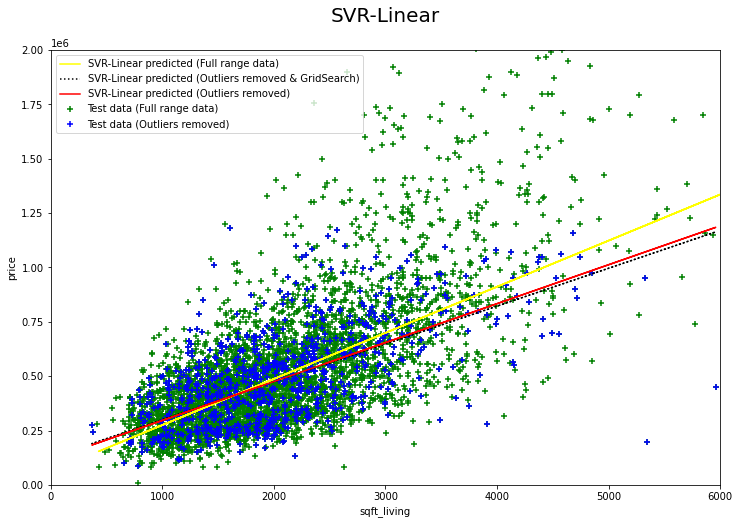

In [39]:
fig = plt.figure(figsize=(12,8))

# Test data (Full range data)
plt.scatter(np.array(df['sqft_living']).reshape(-1,1), np.array(df['price']).reshape(-1,1), 
            marker='+', color='green', label='Test data (Full range data)')

# Test data (Outliers removed)
plt.scatter(sc_X2.inverse_transform(X2_test), sc_y2.inverse_transform(y2_test), 
            marker='+', color='blue', label='Test data (Outliers removed)')

# prediction line
plt.plot(sc_X.inverse_transform(X_test), predicted, color='yellow', ls='-',label='SVR-Linear predicted (Full range data)')
plt.plot(sc_X2.inverse_transform(X2_test), predicted3, color='black', ls=':', label='SVR-Linear predicted (Outliers removed & GridSearch)')
plt.plot(sc_X2.inverse_transform(X2_test), predicted2, color='red', ls='-', label='SVR-Linear predicted (Outliers removed)')

plt.xlabel('sqft_living')
plt.ylabel('price')
#plt.xlim([0,1e4]);plt.ylim([0,5e6])
plt.xlim([0,6e3]);plt.ylim([0,2e6])
plt.legend()
plt.title('SVR-Linear\n', fontsize=20)

In [40]:
# full range data
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train,y_train)

# outlier removed
regressor_rbf2 = SVR(kernel='rbf')
regressor_rbf2.fit(X2_train,y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
#param_rbf = {'C':[0.001,0.01,0.1,1,100,1000],'gamma':[5,3,1,0.1,0.01,0.001,0.0001]}
#output:C=1, gamma=0.01
#param_rbf = {'C':[0.01,0.05,0.1,0.5,1,25,50,75,100],'gamma':[0.001,0.005,0.010,0.050,0.100]}
#output:C=0.1, gamma=0.05
#param_rbf = {'C':np.arange(0.01,0.5,0.01),'gamma':[0.001,0.005,0.010,0.050,0.100]}
#output:C=0.36, gamma=0.01
#param_rbf = {'C':np.arange(0.01,0.5,0.01),'gamma':np.arange(0.001,1,0.01)}
#output:C=0.19, gamma=0.031
#param_rbf = {'C':np.arange(0.001,0.5,0.001),'gamma':np.arange(0.010,0.1,0.001)}
#output:C=0.162, gamma=0.034
#param_rbf = {'C':np.arange(0.1,0.2,0.001),'gamma':np.arange(0.03,0.04,0.0001)}
#output:C=0.174, gamma=0.0318
param_rbf = {'C':[0.174],'gamma':[0.0318]}

grids_rbf = GridSearchCV(SVR(kernel='rbf'), param_rbf, verbose=0, n_jobs=-1)
grids_rbf.fit(X2_train,y2_train)
grids_rbf.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.174, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0318,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
# full range data
predicted_rbf = sc_y.inverse_transform(regressor_rbf.predict(X_test))

# outlier removed
predicted_rbf2 = sc_y2.inverse_transform(regressor_rbf2.predict(X2_test))

# outlier removed & GridSearch
predicted_rbf3 = sc_y2.inverse_transform(grids_rbf.predict(X2_test))

In [43]:
arr_1 = sc_X.inverse_transform(X_test)
arr_1 = np.append(arr_1,predicted_rbf.reshape(-1,1),axis=1)

col_index = 0 # เราจะ sort แกน x คือ sqft_living ซึ่งคือ column ที่ 0 (อีก column มันคือ predict ซึ่งก็คือ ราคา ซึ่งก็คือ แกน y)

sorted_1 = arr_1[np.argsort(arr_1[:,col_index])]

# sorted_1[:,0] # ใช้เรียก column 0 (sqft_living)(แกน X)
# sorted_1[:,1] # ใช้เรียก column 1 (ราคา)(แกน y)

In [44]:
arr_2 = sc_X2.inverse_transform(X2_test)
arr_2 = np.append(arr_2,predicted_rbf3.reshape(-1,1),axis=1)

col_index = 0

sorted_2 = arr_2[np.argsort(arr_2[:,col_index])]

In [45]:
arr_3 = sc_X2.inverse_transform(X2_test)
arr_3 = np.append(arr_3,predicted_rbf2.reshape(-1,1),axis=1)

col_index = 0

sorted_3 = arr_3[np.argsort(arr_3[:,col_index])]

Text(0.5, 0.7, 'Sorted!')

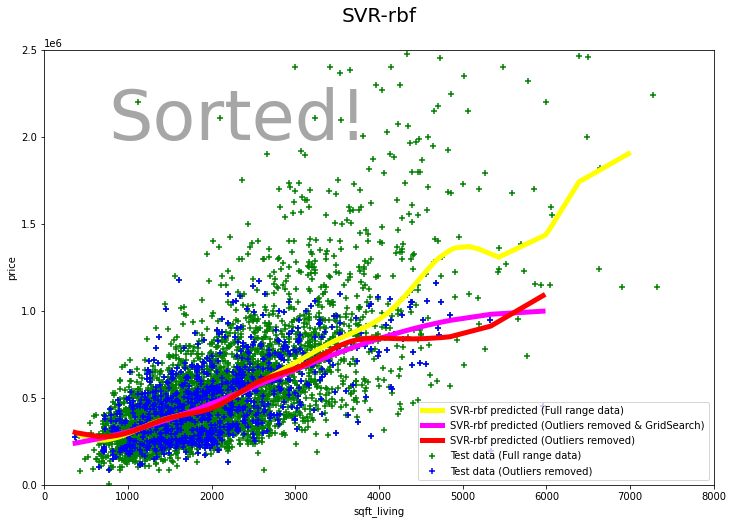

In [46]:
fig = plt.figure(figsize=(12,8))

# Test data (Full range data)
plt.scatter(np.array(df['sqft_living']).reshape(-1,1), np.array(df['price']).reshape(-1,1), 
            marker='+', color='green', label='Test data (Full range data)')

# Test data (Outliers removed)
plt.scatter(sc_X2.inverse_transform(X2_test), sc_y2.inverse_transform(y2_test), 
            marker='+', color='blue', label='Test data (Outliers removed)')

# prediction line
plt.plot(sorted_1[:,0], sorted_1[:,1], linewidth=5, color='yellow', ls='-',label='SVR-rbf predicted (Full range data)')
plt.plot(sorted_2[:,0], sorted_2[:,1], linewidth=5, color='magenta', ls='-', label='SVR-rbf predicted (Outliers removed & GridSearch)')
plt.plot(sorted_3[:,0], sorted_3[:,1], linewidth=5, color='red', ls='-', label='SVR-rbf predicted (Outliers removed)')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.xlim([0,8e3])
plt.ylim([0,2.5e6])
plt.legend()
plt.title('SVR-rbf\n', fontsize=20)

fig.text(0.5, 0.7, 'Sorted!',fontsize=70, color='gray', ha='right', va='bottom', alpha=0.7)

16)
ทดสอบโมเดลวัดค่า MAE, MSE, RMSE

In [48]:
from sklearn import metrics

# y_test อยู่ในรูป Scaled ต้อง inverse_transform ให้อยู่ในรูปปกติก่อนเอามาเทียบกับ predicted ซึ่งอยู่ในรูปปกติ

print('[1 dependent VS 1 independent]' + ' SVR-Linear predicted' + ':-')
print('RMSE (Full range data):', np.sqrt(metrics.mean_squared_error(predicted, sc_y.inverse_transform(y_test))))
print('RMSE (Outliers removed):', np.sqrt(metrics.mean_squared_error(predicted2, sc_y2.inverse_transform(y2_test))))
print('Outliers removed & GridSearch is better! then evaluate it')

print('RMSE (Outliers removed & GridSearch):', np.sqrt(metrics.mean_squared_error(predicted3, sc_y2.inverse_transform(y2_test))))
print('MAE (Outliers removed & GridSearch):', metrics.mean_absolute_error(predicted3, sc_y2.inverse_transform(y2_test)))
print('MSE (Outliers removed & GridSearch):', metrics.mean_squared_error(predicted3, sc_y2.inverse_transform(y2_test)))

print('\n[1 dependent VS 1 independent]' + ' SVR-rbf predicted' + ':-')
print('RMSE (Full range data):', np.sqrt(metrics.mean_squared_error(predicted_rbf, sc_y.inverse_transform(y_test))))
print('RMSE (Outliers removed):', np.sqrt(metrics.mean_squared_error(predicted_rbf2, sc_y2.inverse_transform(y2_test))))
print('Outliers removed & GridSearch is better! then evaluate it')

print('RMSE (Outliers removed & GridSearch):', np.sqrt(metrics.mean_squared_error(predicted_rbf3, sc_y2.inverse_transform(y2_test))))
print('MAE (Outliers removed & GridSearch):', metrics.mean_absolute_error(predicted_rbf3, sc_y2.inverse_transform(y2_test)))
print('MSE (Outliers removed & GridSearch):', metrics.mean_squared_error(predicted_rbf3, sc_y2.inverse_transform(y2_test)))

[1 dependent VS 1 independent] SVR-Linear predicted:-
RMSE (Full range data): 908476.8885897237
RMSE (Outliers removed): 174682.93243742545
Outliers removed & GridSearch is better! then evaluate it
RMSE (Outliers removed & GridSearch): 174496.44705375071
MAE (Outliers removed & GridSearch): 136352.56948428837
MSE (Outliers removed & GridSearch): 30449010034.382423

[1 dependent VS 1 independent] SVR-rbf predicted:-
RMSE (Full range data): 905566.0582201597
RMSE (Outliers removed): 173606.62916991347
Outliers removed & GridSearch is better! then evaluate it
RMSE (Outliers removed & GridSearch): 173264.6277779109
MAE (Outliers removed & GridSearch): 135494.6341781669
MSE (Outliers removed & GridSearch): 30020631239.01802


15)
เทรนโมเดลแบบ Linear และ rbf ของทั้งหมด หรือ features ที่ผู้เรียนคิดว่าเหมาะสม
(ให้เป็น 1 dependent variable VS many independent variables)

Hint: คล้ายๆ Multiple Linear Regression แต่ต้องทำ Data Scaling กับทุก features

In [49]:
# Data Transformation
X_bedrooms = np.array(df2['bedrooms']).reshape(-1,1)
X_bathrooms = np.array(df2['bathrooms']).reshape(-1,1)
X_sqft_living = np.array(df2['sqft_living']).reshape(-1,1)
X_view = np.array(df2['view']).reshape(-1,1)
X_sqft_above = np.array(df2['sqft_above']).reshape(-1,1)
y_multi = np.array(df2['price']).reshape(-1,1)

In [50]:
# Data Scaling (Standardisation)
sc_X_bedrooms = StandardScaler()
sc_X_bathrooms = StandardScaler()
sc_X_sqft_living = StandardScaler()
sc_X_view = StandardScaler()
sc_X_sqft_above = StandardScaler()
sc_y_multi = StandardScaler()

X_bedrooms = sc_X_bedrooms.fit_transform(X_bedrooms)
X_bathrooms = sc_X_bathrooms.fit_transform(X_bathrooms)
X_sqft_living = sc_X_sqft_living.fit_transform(X_sqft_living)
X_view = sc_X_view.fit_transform(X_view)
X_sqft_above = sc_X_sqft_above.fit_transform(X_sqft_above)
y_multi = sc_y_multi.fit_transform(y_multi)

# appending array
arr = X_bedrooms
arr = np.append(arr, X_bathrooms, axis=1)
arr = np.append(arr, X_sqft_living, axis=1)
arr = np.append(arr, X_view, axis=1)
arr = np.append(arr, X_sqft_above, axis=1)
arr

# creating DataFrame from 5 features
X_multi = pd.DataFrame({'bedrooms':arr[:,0],'bathrooms':arr[:,1],
                  'sqft_living':arr[:,2],'view':arr[:,3],
                  'sqft_above':arr[:,4]})

In [51]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=100)

In [52]:
## SVR-Linear ##
regressor_lin_multi = SVR(kernel='linear')
regressor_lin_multi.fit(X_train_multi,y_train_multi)

## SVR-rbf ##
regressor_rbf_multi = SVR(kernel='rbf')
regressor_rbf_multi.fit(X_train_multi,y_train_multi)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
predicted_lin_multi = sc_y_multi.inverse_transform(regressor_lin_multi.predict(X_test_multi))
predicted_rbf_multi = sc_y_multi.inverse_transform(regressor_rbf_multi.predict(X_test_multi))

17)
เทรนโมเดลแบบ Simple Linear Regression และ Multiple Linear Regression
(สามารถเลือกคู่ได้ หรือ จะลองทุกคู่ก็ได้ ตามความคิดของผู้เรียน)

In [54]:
from sklearn.linear_model import LinearRegression

## Simple Linear Regression ##
X_SLR = df2['sqft_living']
y_SLR = df2['price']

# split
X_train_SLR, X_test_SLR, y_train_SLR, y_test_SLR = train_test_split(X_SLR, y_SLR, test_size=0.2, random_state=100)

# reshape
X_train_SLR = np.array(X_train_SLR).reshape(-1,1)
X_test_SLR = np.array(X_test_SLR).reshape(-1,1)

# train
lm_SLR = LinearRegression()
lm_SLR.fit(X_train_SLR, y_train_SLR)

# predict
predicted_SLR = lm_SLR.predict(X_test_SLR)

In [55]:
## Multiple Linear Regression ##
X_MLR = df2[['bedrooms','bathrooms','sqft_living','view','sqft_above']]
y_MLR = df2['price']

# split
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size=0.2, random_state=100)

# train
lm_MLR = LinearRegression()
lm_MLR.fit(X_train_MLR, y_train_MLR)

# predict
predicted_MLR = lm_MLR.predict(X_test_MLR)

18)
ทดสอบโมเดลวัดค่า MAE, MSE, RMSE

In [56]:
print('Simple Linear Regression :-')
print('MAE:', metrics.mean_absolute_error(y_test_SLR, predicted_SLR))
print('MSE:', metrics.mean_squared_error(y_test_SLR, predicted_SLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_SLR, predicted_SLR)))

## Multiple Linear Regression ##
print('\nMultiple Linear Regression :-')
print('MAE:', metrics.mean_absolute_error(y_test_MLR, predicted_MLR))
print('MSE:', metrics.mean_squared_error(y_test_MLR, predicted_MLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_MLR, predicted_MLR)))

Simple Linear Regression :-
MAE: 136281.27683284256
MSE: 30310866820.83342
RMSE: 174100.1631843963

Multiple Linear Regression :-
MAE: 133942.1131041826
MSE: 29730354012.52553
RMSE: 172424.9228288229


19)
เปรียบเทียบผลลัพธ์ที่ดีที่สุดของ Linear Regression กับ SVR ว่าโมเดลไหนมีประสิทธิภาพมากกว่า

In [57]:
# Best of SVR
print('SVR :-')
print('[1 dependent VS 1 independent] [SVR-Linear] \t\tRMSE:', np.sqrt(metrics.mean_squared_error(predicted3, sc_y2.inverse_transform(y2_test))))
print('[1 dependent VS 1 independent] [SVR-rbf] \t\tRMSE:', np.sqrt(metrics.mean_squared_error(predicted_rbf3, sc_y2.inverse_transform(y2_test))))
print('[Multiple Features] [SVR-Linear] \tRMSE:', np.sqrt(metrics.mean_squared_error(predicted_lin_multi, sc_y_multi.inverse_transform(y_test_multi))))
print('[Multiple Features] [SVR-rbf] \t\tRMSE:', np.sqrt(metrics.mean_squared_error(predicted_rbf_multi, sc_y_multi.inverse_transform(y_test_multi))))

# Best of Linear Regression
print('\nLinear Regression :-')
print('[Simple Linear Regression] \t\tRMSE:', np.sqrt(metrics.mean_squared_error(y_test_SLR, predicted_SLR)))
print('[Multiple Linear Regression] \t\tRMSE:', np.sqrt(metrics.mean_squared_error(y_test_MLR, predicted_MLR)))

SVR :-
[1 dependent VS 1 independent] [SVR-Linear] 		RMSE: 174496.44705375071
[1 dependent VS 1 independent] [SVR-rbf] 		RMSE: 173264.6277779109
[Multiple Features] [SVR-Linear] 	RMSE: 173593.34335162304
[Multiple Features] [SVR-rbf] 		RMSE: 168297.48404502764

Linear Regression :-
[Simple Linear Regression] 		RMSE: 174100.1631843963
[Multiple Linear Regression] 		RMSE: 172424.9228288229


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


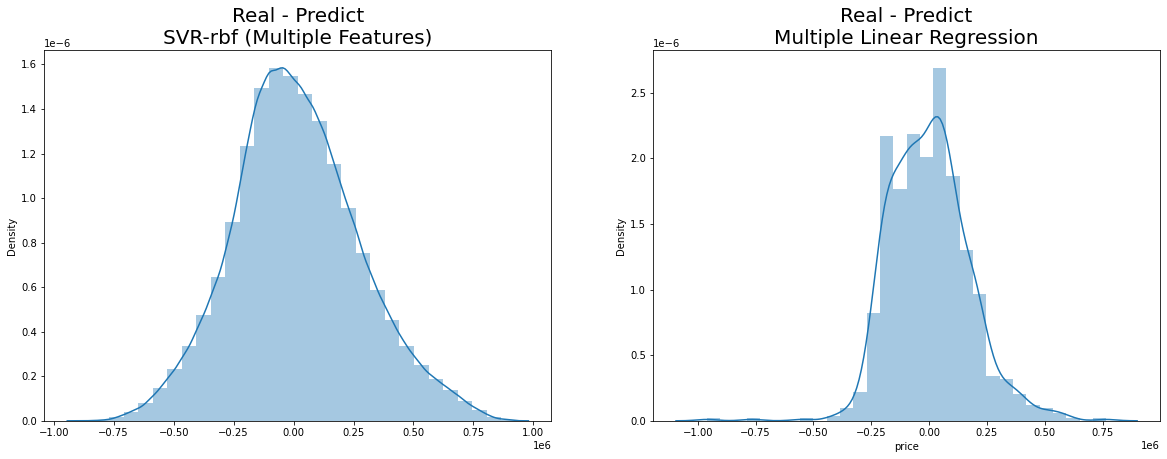

In [58]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot(221)
ax1.set_title('Real - Predict\nSVR-rbf (Multiple Features)',fontsize = 20)
sns.distplot((sc_y2.inverse_transform(y_test_multi) - predicted_rbf_multi),bins=30)

ax2 = plt.subplot(222)
ax2.set_title('Real - Predict\nMultiple Linear Regression',fontsize = 20)
sns.distplot((y_test_MLR - predicted_MLR),bins=30)

โมเดล SVR-rbf (Multiple Features) ให้ค่า RMSE น้อยกว่า และ distribution plot ก็มีความ norm dist มากกว่าด้วย

20)
สร้าง scatter plot และ prediction line ของ simple linear regression ที่ดีที่สุด และ SVR ( แบบ 1 dependent VS 1 independent) ที่ดีที่สุด

In [59]:
arr_4 = sc_X2.inverse_transform(X2_test)
arr_4 = np.append(arr_4,predicted_rbf3.reshape(-1,1),axis=1)

col_index = 0 # เราจะ sort แกน x คือ sqft_living ซึ่งคือ column ที่ 0 (อีก column มันคือ predict ซึ่งก็คือ ราคา ซึ่งก็คือ แกน y)

sorted_4 = arr_4[np.argsort(arr_4[:,col_index])]

# sorted_4[:,0] # ใช้เรียก column 0 (sqft_living)(แกน X)
# sorted_4[:,1] # ใช้เรียก column 1 (ราคา)(แกน y)

RMSE :-
[SVR-rbf] 			RMSE : 173264.6277779109
[Simple Linear Regression] 	RMSE : 174100.1631843963


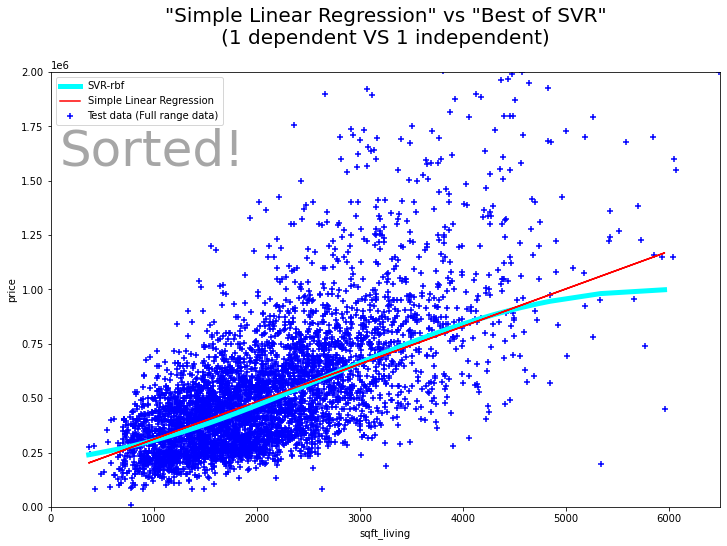

In [61]:
fig = plt.figure(figsize=(12,8))

# Test data (Full range data)
plt.scatter(np.array(df['sqft_living']).reshape(-1,1), np.array(df['price']).reshape(-1,1), 
            marker='+', color='blue', label='Test data (Full range data)')

# prediction line
plt.plot(sorted_4[:,0], sorted_4[:,1], linewidth=5, color='cyan', ls='-', label='SVR-rbf')
plt.plot(X_test_SLR, predicted_SLR, color='red', ls='-', label='Simple Linear Regression')

plt.xlabel('sqft_living')
plt.ylabel('price')
#plt.xlim([0,1e4]);plt.ylim([0,5e6])
plt.xlim([0,6.5e3]);plt.ylim([0,2e6])
plt.legend()
plt.title('\"Simple Linear Regression\" vs \"Best of SVR\"\n(1 dependent VS 1 independent)\n', fontsize=20)

fig.text(0.35, 0.7, 'Sorted!',fontsize=50, color='gray', ha='right', va='bottom', alpha=0.7)

print('RMSE :-')
print('[SVR-rbf] \t\t\tRMSE :', np.sqrt(metrics.mean_squared_error(predicted_rbf3, sc_y2.inverse_transform(y2_test))))
print('[Simple Linear Regression] \tRMSE :', np.sqrt(metrics.mean_squared_error(y_test_SLR, predicted_SLR)))